> # Homework 1
> This homework contains several coding tasks and Q&A questions.
>
>>For coding part, please write codes in corresponding cells starts from **YOUR CODES HERE**.
>>
>>For Q&A, you will see cells with **Answer: HERE**. Please double click those cells and directly write your answer.
>>
>>For other cells, please directly run the cell.
>>
>>**Please make sure you have expanded all hidden cells!** You can refer to https://stackoverflow.com/questions/62457417/unhide-all-cells-in-google-colab for more information.
>
>
> You should use Python 3 to do this homework. Python 2 may not be supported. You are encouraged to use Google Colab for this homework.
>
>
> ## Due Date: Feb. 23, 22:00 SG Time
> ## Deliverables
> Save your notebook `ipynb` file as `StudentID_YourName_HW1.ipynb`, generate an `html` file from `ipynb` file and save as `StudentID_YourName_HW1.html`. Zip your notebook file and html file into a single `zip` file. (Do NOT include the data in your zip file.)
>
> **Upload the `zip` file as `StudentID_YourName_HW1.zip`.**
>
> **Please make sure your code is executable.**
>
>>How to generate an HTML file from your notebook file in Google Colab?  
>>Please refer to https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab
>
> ## HW1 worths 13 points in the final assessment.

**STU1**

StuID: A0222482L

Name: Wong Deshun


**STU2**

StuID: A0216929U

Name: Muhammed Rilwan S/O Mohamed Haniffa

*In compliance with the* [*general message*](https://libguides.nus.edu.sg/new2nus/acadintegrity#s-lib-ctab-22144949-4) *and* [*guidelines*](https://libguides.nus.edu.sg/new2nus/acadintegrity#s-lib-ctab-22144949-5) *on the use of AI tools for academic work from the University, if you use any AI tools for this homework, please fill in the table below. Thank you.*


| AI Tool used    |   Prompt and output   |   How the output was used in the assignment   |
| ---- | ---- | ---- |
|   --   |   --   |   --   |
|   --   |   --   |   --   |

In [157]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Please refer to
# https://scikit-learn.org/stable/
# for more information

from scipy.stats import pearsonr
# Please refer to
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# for more information

# Disable warnings
import warnings
warnings.filterwarnings('ignore')


In [158]:
# To fix random seeds (Note that you may still get slightly different results.)
np.random.seed(12)

In [159]:
# Connect your Google Drive to your Colab file
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/IS4303
! ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IS4303
col_list.csv  loan_2024.csv


# Data Input & EDA

In [129]:
# Input the data loan_2024.csv by pd.read_csv as 'data'
# Input the column names col_list.csv by pd.read_csv as 'col_list'
# Please avoid opening the data CSV file by Microsoft Excel
# as it may cause some issues with the format.
# You can always download a new copy from CANVAS
# if you have already opened it with Excel.
# The description of features are in the 'Feature Description.xlsx'

data = pd.read_csv('loan_2024.csv')
col_list = pd.read_csv('col_list.csv')


In [130]:
# We use the column 'good_bad' as the target variable,
# 1 indicates good loans, 0 indicates bad loans
# We use the rest of the columns as the features (except for 'LoanStatus')
target_list = ['good_bad']
feature_list = [i for i in col_list['col_list'].values if i not in ['LoanStatus']]

print(data['good_bad'].value_counts())

1    94756
0     5018
Name: good_bad, dtype: int64


How many loans in the dataset are the good ones? (0.5 points)

Answer HERE: 94756 loans in the dataset are good loans.

In [131]:
# Use this cell for the Q&A if necessary


In [132]:
# Create dataset from raw data
X = data[feature_list]
y = data[target_list]

In [133]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(69841, 28) (29933, 28) (69841, 1) (29933, 1)


In [134]:
# Reset index of X_train, X_test, y_train, y_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Why do we do the split here? (0.5 points)

Answer HERE: By splitting the data into training and testing data set, we can use one subset of data to train your model, and another subset to test how well the model works on new and unseen data. This way, you can avoid overfitting, which occurs when the model learns too much from the training data and fails to generalize to new data.

### Data Type & Handle Missing Values

In [135]:
# print the type of each feature in X_train,
# you will find that one feature is categorical (i.e., object type),
# and one feature is binary (i.e., bool type)
print(X_train.dtypes)


Term                                    int64
BorrowerAPR                           float64
BorrowerRate                          float64
LenderYield                           float64
Occupation                             object
IsBorrowerHomeowner                      bool
CreditScoreRangeLower                 float64
CreditScoreRangeUpper                 float64
CurrentCreditLines                    float64
OpenCreditLines                       float64
TotalCreditLinespast7years            float64
OpenRevolvingAccounts                   int64
OpenRevolvingMonthlyPayment           float64
InquiriesLast6Months                  float64
TotalInquiries                        float64
CurrentDelinquencies                  float64
AmountDelinquent                      float64
DelinquenciesLast7Years               float64
PublicRecordsLast10Years              float64
PublicRecordsLast12Months             float64
RevolvingCreditBalance                float64
BankcardUtilization               

In [136]:
# Check the missing values in X_train and X_test
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Term                                     0
BorrowerAPR                             17
BorrowerRate                             0
LenderYield                              0
Occupation                            2275
IsBorrowerHomeowner                      0
CreditScoreRangeLower                  389
CreditScoreRangeUpper                  389
CurrentCreditLines                    4379
OpenCreditLines                       4379
TotalCreditLinespast7years             449
OpenRevolvingAccounts                    0
OpenRevolvingMonthlyPayment              0
InquiriesLast6Months                   449
TotalInquiries                         714
CurrentDelinquencies                   449
AmountDelinquent                      4392
DelinquenciesLast7Years                607
PublicRecordsLast10Years               449
PublicRecordsLast12Months             4379
RevolvingCreditBalance                4379
BankcardUtilization                   4379
AvailableBankcardCredit               4340
TotalTrades

In [137]:
# For NaN's in the categorical feature, fill them with 'Other'
X_train['Occupation'] = X_train['Occupation'].fillna('Other')
X_test['Occupation'] = X_test['Occupation'].fillna('Other')

In [138]:
# Given X_train and X_test, (0.5 + 0.5 points)
# for each feature (column) with missing values,
# if this feature is bool type,
# fill the missing values with **mode** values based on the occupation group he/she belongs to
# if this feature is numerical type,
# fill the missing values with **mean** values based on the occupation group he/she belongs to

# X_train
# YOUR CODES HERE
for column in X_train.columns:
  if X_train[column].dtype == 'bool':
    X_train[column] = X_train.groupby('Occupation')[column].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Other"))
  elif X_train[column].dtype == 'float64' or X_train[column].dtype == 'int64':
    X_train[column] = X_train.groupby('Occupation')[column].apply(lambda x: x.fillna(x.mean()))

# X_test
# YOUR CODES HERE
for column in X_test.columns:
  if X_test[column].dtype == 'bool':
    X_test[column] = X_test.groupby('Occupation')[column].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Other"))
  elif X_test[column].dtype == 'float64' or X_test[column].dtype == 'int64':
    X_test[column] = X_test.groupby('Occupation')[column].apply(lambda x: x.fillna(x.mean()))

In [139]:
# Check again the missing values in X_train and X_test (should be all 0's now)
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Term                                  0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
Occupation                            0
IsBorrowerHomeowner                   0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
CurrentCreditLines                    0
OpenCreditLines                       0
TotalCreditLinespast7years            0
OpenRevolvingAccounts                 0
OpenRevolvingMonthlyPayment           0
InquiriesLast6Months                  0
TotalInquiries                        0
CurrentDelinquencies                  0
AmountDelinquent                      0
DelinquenciesLast7Years               0
PublicRecordsLast10Years              0
PublicRecordsLast12Months             0
RevolvingCreditBalance                0
BankcardUtilization                   0
AvailableBankcardCredit               0
TotalTrades                           0
TradesNeverDelinquent (percentage)    0


### Outlier Detection

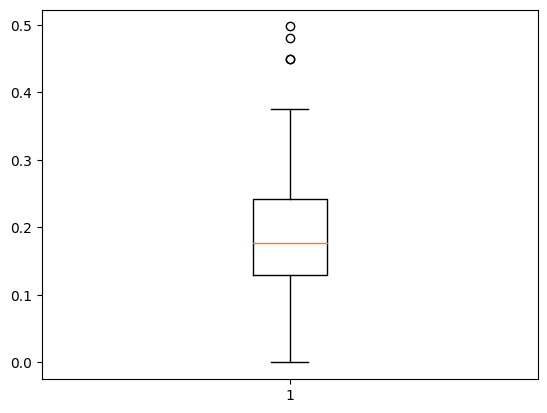

In [140]:
# Detect outliers in X_train['BorrowerRate'] by boxplot
plt.boxplot(X_train['BorrowerRate'])
plt.show()


Do you think there are outliers in the feature 'BorrowerRate'? Why? (0.5 points)

Answer HERE: Yes there are outliers in the feature 'BorrowerRate', it is represented by points that fall outside of the whiskers. In the boxplot, there are several points above the upper whisker, which indicates that these values are outliers in the context of the 'BorrowerRate' distribution.

# Data Preprocessing

In [141]:
# Only select some features (i.e., except for 'Occupation', 'IsBorrowerHomeowner')

X_train_nmr = X_train.drop(['Occupation', 'IsBorrowerHomeowner'], axis=1)
X_test_nmr = X_test.drop(['Occupation', 'IsBorrowerHomeowner'], axis=1)
print(X_train_nmr.shape, y_train.shape, X_test_nmr.shape, y_test.shape)

(69841, 26) (69841, 1) (29933, 26) (29933, 1)


In [142]:
# Feature preprocessing by StandardScaler (0.5 + 0.5 points)
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# USE scaler = StandardScaler(), scaler.fit_transform(...), scaler.transform(...)
# YOUR CODES HERE

scaler = StandardScaler()
X_train_nmr = scaler.fit_transform(X_train_nmr)
X_test_nmr = scaler.transform(X_test_nmr)



## Feature Selection

In [143]:
# Strategy 1: VarianceThreshold. The training and testing data after this step will be **X_train1, y_train, X_test1, y_test**.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.16)
X_train1 = sel.fit_transform(X_train_nmr)
X_test1 = sel.transform(X_test_nmr)


In [144]:
# Strategy 2: SelectKBest. The training and testing data after this step will be **X_train2, y_train, X_test2, y_test**.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

from sklearn.feature_selection import SelectKBest, f_classif
sel = SelectKBest(f_classif, k=10)

X_train2 = sel.fit_transform(X_train_nmr, y_train)
X_test2 = sel.transform(X_test_nmr)


In [145]:
# Strategy 3: RFE. The training and testing data after this step will be **X_train3, y_train, X_test3, y_test**.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
sel = RFE(LogisticRegression(max_iter=10000), n_features_to_select=10)
X_train3 = sel.fit_transform(X_train_nmr, y_train)
X_test3 = sel.transform(X_test_nmr)


In [146]:
# Run this cell
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train1.shape, X_test1.shape, y_train.shape, y_test.shape)
print(X_train2.shape, X_test2.shape, y_train.shape, y_test.shape)
print(X_train3.shape, X_test3.shape, y_train.shape, y_test.shape)

(69841, 28) (29933, 28) (69841, 1) (29933, 1)
(69841, 26) (29933, 26) (69841, 1) (29933, 1)
(69841, 10) (29933, 10) (69841, 1) (29933, 1)
(69841, 10) (29933, 10) (69841, 1) (29933, 1)


Explain the difference between X_train, X_train1, X_train2, and X_train3. (0.5 points)

Answer HERE: X_train is the orignal training dataset with 28 features, with no feature selection or scaling has been applied to the dataset yet.
X_train1 uses Variance Threshold as a feature selection method that removes all features whose variance does not meet some threshold (in this case, 0.16). This has reduced the number of features from 28 to 26, signifying that two features had a variance lower than the threshold and were removed.
X_train2 uses 'SelectKBest' which selects the top k features that have the highest scores with the f_classif function, which computes the ANOVA F-value between each feature and the target variable. Since k=10 was specified, the feature space was reduced from 28 to 10, keeping only the top 10 features with the highest scores.
X_train3 uses RFE (Recursive Feature Elimination) with a LogisticRegression estimator to X_train_nmr. RFE recursively removes features and builds a model on the features that remain. It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable. Since n_features_to_select=10 was specified, it reduced the feature set to the top 10 features deemed most important by the LogisticRegression model.

# Logistic Regression
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Model Training

In [147]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42,
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Create a model and fit with training data X_train1, y_train (0.5 points)

In [148]:
# YOUR CODES HERE
clf1 = LogisticRegression(**model_setup).fit(X_train1, y_train)



Get predicted results of X_test1 as y_pred1, fitted results of X_train1 as y_pred_train1 (0.5 points)

In [149]:
# YOUR CODES HERE
# USE clf1.predict()
y_pred1 = clf1.predict(X_test1)
y_pred_train1 = clf1.predict(X_train1)


## Model Evaluation

Print the accuracy. (We use **Accuracy** for evaluation in HW1. We will explore more on evaluation metrics in HW2.)

In [150]:
print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train1),
                                  accuracy_score(y_test, y_pred1)))

Training Accuracy: 0.952477771, Testing Accuracy: 0.951525073


## Model Selection

Now that you have learned how to build a Logistic Regression Model, you will need to build 2 additional models by training data X_train2, and X_train3 and report the accuracy. ((0.5+0.5)+(0.5+0.5) points)

In [151]:
# YOUR CODES HERE
# clf2 for X_train2, X_test2, output will be y_pred2, y_pred_train2
# ...
clf2 = LogisticRegression(**model_setup).fit(X_train2, y_train)
y_pred2 = clf2.predict(X_test2)
y_pred_train2 = clf2.predict(X_train2)



print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train2),
                                  accuracy_score(y_test, y_pred2)))

Training Accuracy: 0.952305952, Testing Accuracy: 0.951324625


In [152]:
# YOUR CODES HERE
# clf3 for X_train3, X_test3, output will be y_pred3, y_pred_train3
# ...
clf3 = LogisticRegression(**model_setup).fit(X_train3, y_train)
y_pred3 = clf3.predict(X_test3)
y_pred_train3 = clf3.predict(X_train3)


print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train3),
                                    accuracy_score(y_test, y_pred3)))

Training Accuracy: 0.952005269, Testing Accuracy: 0.951424849


Among X_train, X_train1, X_train2, and X_train3, which one will produce better accuracy score? Why? (0.5 points)

Answer HERE: X_train3 will produce the best accuracy score as is based on recursive feature elimination, which is a more sophisticated method that not only considers individual feature importance but also the combination of features. Hence, it potentially offer a better generalization to unseen data despite the similar accuracy on the given test set.

## Incorporate other features

Next, we incorporate other features we dropped earlier (i.e., 'Occupation' and 'IsBorrowerHomeowner')

In [153]:
# Create X_train4, X_test4, y_train, y_test based on X_train1,
# Add 'Occupation', 'IsBorrowerHomeowner'
X_train4 = pd.DataFrame(X_train1)
X_test4 = pd.DataFrame(X_test1)
X_train4['Occupation'] = X_train['Occupation']
X_test4['Occupation'] = X_test['Occupation']

X_train4['IsBorrowerHomeowner'] = X_train['IsBorrowerHomeowner'].copy()
X_test4['IsBorrowerHomeowner'] = X_test['IsBorrowerHomeowner'].copy()

print(X_train4.shape, y_train.shape, X_test4.shape, y_test.shape)

(69841, 28) (69841, 1) (29933, 28) (29933, 1)


### Feature Encoding for categorical features

For feature 'Occupation', we will use one-hot encoding. (0.5+0.5 points)

In [154]:
# Preprocess for 'Occupation' by one-hot encoding
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# USE OneHotEncoder(sparse=False)
# Input is X_train4[['Occupation']], and X_test4[['Occupation']]
# Output is X_train4_onehot, and X_test4_onehot
# YOUR CODES HERE
ohe = OneHotEncoder(sparse=False)
X_train4_onehot = ohe.fit_transform(X_train4[['Occupation']])
X_test4_onehot = ohe.transform(X_test4[['Occupation']])

print(X_train4_onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [155]:
# Run this cell
# add one-hot encoded columns to X_train4, X_test4
X_train4 = pd.concat([X_train4, pd.DataFrame(X_train4_onehot)], axis=1)
X_test4 = pd.concat([X_test4, pd.DataFrame(X_test4_onehot)], axis=1)


# drop occupation
X_train4.drop(columns=['Occupation'], inplace=True)
X_test4.drop(columns=['Occupation'], inplace=True)

# preprocess for 'IsBorrowerHomeowner'
X_train4['IsBorrowerHomeowner'] = X_train4['IsBorrowerHomeowner'].astype(int)
X_test4['IsBorrowerHomeowner'] = X_test4['IsBorrowerHomeowner'].astype(int)


Train a Logistic Regression model with X_train4, and report the accuracy. (0.5 points)

In [156]:
# YOUR CODES HERE
# clf4 for X_train4, X_test4, output will be y_pred4, y_pred_train4
# ...
clf4 = LogisticRegression(**model_setup).fit(X_train4, y_train)
y_pred4 = clf4.predict(X_test4)
y_pred_train4 = clf4.predict(X_train4)



print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train4),
                                    accuracy_score(y_test, y_pred4)))

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

## Regularization

**From now on, we will use X_train4, y_train, X_test4, y_test.**

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42,
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization (0.5 points)

In [ ]:
# Run this cell for Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

In [ ]:
# Fit a new model with model_setup and produce the accuracy score
# YOUR CODES HERE
# ...



print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train),
                                  accuracy_score(y_test, y_pred)))

Strategy 2: Ridge Regularization (0.5 points)

In [ ]:
# Run this cell for Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

In [ ]:
# Fit a new model with model_setup and produce the accuracy score
# YOUR CODES HERE
# ...



print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train),
                                  accuracy_score(y_test, y_pred)))

Describe the difference between Lasso and Ridge Regularization. Describe any observations you find in the results above. (0.5 + 0.5 points)

Answer HERE:

## Cross Validation

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

**We continue to use X_train4, y_train, X_test4, y_test.**

In [ ]:
# Cross Validation Setup: 5-Fold CV
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42,
             'max_iter':10000, 'solver': 'liblinear', 'penalty': 'l2'}

Build **Two** Logistic Regression Models, one with Lasso Regularization, another one with Ridge Regularization. (0.5+0.5 points)


In [ ]:
# Please use the following settings for two models respectively.

# # For Lasso Regularization parameter setting
# model_setup['penalty'] = 'l1'

# # For Ridge Regularization parameter setting
# model_setup['penalty'] = 'l2'

# Build your model by model = LogisticRegression(**model_setup)
# Build the Cross Validation for each model by
# clf1 and clf2 = cross_val_score(model, X_train4, y_train, cv = kf, scoring = 'accuracy')

# YOUR CODES HERE










In [ ]:
# Evaluate two models
# USE clf.mean()
print(clf1.mean())
print(clf2.mean())


Describe the mechanism of Cross Validation. Describe any observations you find in the CV experiments above. (0.5+0.5 points)

Answer HERE: